# Investigate a Dataset: Life Expectancy Predictors


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The main aim of this exploratory analysis is to answer is there a relationship between life expectancy and selected predictor variables including income, urban population, medical doctors, CO2 emissions and Gini?
>
> For this analysis, the following variables were selected from __[Gapminder World](https://www.gapminder.org/data/)__:<br>
> Life Expectancy = (years)<br>
> Income per Person = (GDP per capita, PPP$ inflation-adjusted)<br>
> Urban Population = (% of Total)<br>
> Medical Doctors = (per 1000 people)<br>
> CO2 Emission = (metric tonnes of CO2 per person)<br>
> Gini = Inequality index<br>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [2]:
life_expectancy = pd.read_csv('life_expectancy_years.csv')
income = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
urban_population = pd.read_csv('urban_population_percent_of_total.csv')
medical_doctors = pd.read_csv('medical_doctors_per_1000_people.csv')
co2_emission = pd.read_csv('co2_emissions_tonnes_per_person.csv')
gini = pd.read_csv('inequality_index_gini.csv')

Create lists of countries/regions and dataframe.

In [3]:
countries = list(["Afghanistan","Albania","Algeria","Andorra","Angola","Antigua and Barbuda","Argentina","Armenia","Australia","Austria","Azerbaijan","Bahamas","Bahrain","Bangladesh","Barbados","Belarus","Belgium","Belize","Benin","Bhutan","Bolivia","Bosnia and Herzegovina","Botswana","Brazil","Brunei","Bulgaria","Burkina Faso","Burundi","Cambodia","Cameroon","Canada","Cape Verde","Central African Republic","Chad","Chile","China","Colombia","Comoros","Congo, Dem. Rep.","Congo, Rep.","Costa Rica","Cote d'Ivoire","Croatia","Cuba","Cyprus","Czech Republic","Denmark","Djibouti","Dominica","Dominican Republic","Ecuador","Egypt","El Salvador","Equatorial Guinea","Eritrea","Estonia","Ethiopia","Fiji","Finland","France","Gabon","Gambia","Georgia","Germany","Ghana","Greece","Grenada","Guatemala","Guinea","Guinea-Bissau","Guyana","Haiti","Holy See","Honduras","Hong Kong, China","Hungary","Iceland","India","Indonesia","Iran","Iraq","Ireland","Israel","Italy","Jamaica","Japan","Jordan","Kazakhstan","Kenya","Kiribati","North Korea","South Korea","Kuwait","Kyrgyz Republic","Lao","Latvia","Lebanon","Lesotho","Liberia","Libya","Liechtenstein","Lithuania","Luxembourg","Macedonia, FYR","Madagascar","Malawi","Malaysia","Maldives","Mali","Malta","Marshall Islands","Mauritania","Mauritius","Mexico","Micronesia, Fed. Sts.","Moldova","Monaco","Mongolia","Montenegro","Morocco","Mozambique","Myanmar","Namibia","Nauru","Nepal","Netherlands","New Zealand","Nicaragua","Niger","Nigeria","Norway","Oman","Pakistan","Palau","Panama","Papua New Guinea","Paraguay","Peru","Philippines","Poland","Portugal","Qatar","Romania","Russia","Rwanda","St. Kitts and Nevis","St. Lucia","St. Vincent and the Grenadines","Samoa","San Marino","Sao Tome and Principe","Saudi Arabia","Senegal","Serbia","Seychelles","Sierra Leone","Singapore","Slovak Republic","Slovenia","Solomon Islands","Somalia","South Africa","Spain","Sri Lanka","Sudan","Suriname","Swaziland","Sweden","Switzerland","Syria","Taiwan","Tajikistan","Tanzania","Thailand","Timor-Leste","Togo","Tonga","Trinidad and Tobago","Tunisia","Turkey","Turkmenistan","Tuvalu","Uganda","Ukraine","United Arab Emirates","United Kingdom","United States","Uruguay","Uzbekistan","Vanuatu","Venezuela","Palestine","Vietnam","Yemen","Zambia","Zimbabwe","South Sudan"])
regions = list(["Asia","Europe","Africa","Europe","Africa","Americas","Americas","Europe","Asia","Europe","Europe","Americas","Asia","Asia","Americas","Europe","Europe","Americas","Africa","Asia","Americas","Europe","Africa","Americas","Asia","Europe","Africa","Africa","Asia","Africa","Americas","Africa","Africa","Africa","Americas","Asia","Americas","Africa","Africa","Africa","Americas","Africa","Europe","Americas","Europe","Europe","Europe","Africa","Americas","Americas","Americas","Africa","Americas","Africa","Africa","Europe","Africa","Asia","Europe","Europe","Africa","Africa","Europe","Europe","Africa","Europe","Americas","Americas","Africa","Africa","Americas","Americas","Europe","Americas","Asia","Europe","Europe","Asia","Asia","Asia","Asia","Europe","Asia","Europe","Americas","Asia","Asia","Asia","Africa","Asia","Asia","Asia","Asia","Asia","Asia","Europe","Asia","Africa","Africa","Africa","Europe","Europe","Europe","Europe","Africa","Africa","Asia","Asia","Africa","Europe","Asia","Africa","Africa","Americas","Asia","Europe","Europe","Asia","Europe","Africa","Africa","Asia","Africa","Asia","Asia","Europe","Asia","Americas","Africa","Africa","Europe","Asia","Asia","Asia","Americas","Asia","Americas","Americas","Asia","Europe","Europe","Asia","Europe","Europe","Africa","Americas","Americas","Americas","Asia","Europe","Africa","Asia","Africa","Europe","Africa","Africa","Asia","Europe","Europe","Asia","Africa","Africa","Europe","Asia","Africa","Americas","Africa","Europe","Europe","Asia","Asia","Asia","Africa","Asia","Asia","Africa","Asia","Americas","Africa","Europe","Asia","Asia","Africa","Europe","Asia","Europe","Americas","Americas","Asia","Asia","Americas","Asia","Asia","Asia","Africa","Africa","Africa"])                    
        

In [4]:
country_region = pd.DataFrame ({'geo':np.array(countries),
                              'region':np.array(regions)})

Extract relevant data from each dataset, in this case, the country data for year 2010.

In [5]:
life_expectancy = life_expectancy[['geo','2010']]
income = income[['geo','2010']]
urban_population = urban_population[['geo','2010']]
medical_doctors = medical_doctors[['geo','2010']]
co2_emission = co2_emission[['geo','2010']]
gini = gini[['geo','2010']]

#https://stackoverflow.com/questions/48641632/extracting-specific-columns-from-pandas-dataframe

Create a combined dataset.

In [6]:
df = pd.concat((join_df.set_index('geo') for join_df in [country_region,life_expectancy,income,urban_population,medical_doctors,co2_emission,gini]),axis=1, join='inner').reset_index()

#https://stackoverflow.com/questions/23668427/pandas-joining-multiple-dataframes-on-columns

In [7]:
df.head()

,geo,region,2010,2010,2010,2010,2010,2010
0,Albania,Europe,76.3,9930,52.2,1.25,1.56,NaN
1,Algeria,Africa,76.5,12900,67.5,1.21,3.30,NaN
2,Angola,Africa,60.1,5900,40.1,NaN,1.24,NaN
3,Argentina,Americas,75.8,18700,91.0,3.21,4.56,43.0
4,Armenia,Europe,73.3,6700,63.6,2.76,1.47,30.0


### Data Cleaning
Rename columns.

In [8]:
df.columns = ['Country','Region','LifeExpectancy','Income','UrbanPopulation','MedicalDoctors','CO2Emission','Gini']

In [9]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 8 columns):
Country            161 non-null object
Region             161 non-null object
LifeExpectancy     161 non-null float64
Income             161 non-null int64
UrbanPopulation    161 non-null float64
MedicalDoctors     131 non-null float64
CO2Emission        161 non-null float64
Gini               81 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 10.1+ KB


Convert to proper data types for country and region.

In [10]:
df.Country = df.Country.astype('category')
df.Region = df.Region.astype('category')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 8 columns):
Country            161 non-null category
Region             161 non-null category
LifeExpectancy     161 non-null float64
Income             161 non-null int64
UrbanPopulation    161 non-null float64
MedicalDoctors     131 non-null float64
CO2Emission        161 non-null float64
Gini               81 non-null float64
dtypes: category(2), float64(5), int64(1)
memory usage: 14.5 KB


Check null/shape/duplicated values.

In [12]:
df.isnull().sum()

Country             0
Region              0
LifeExpectancy      0
Income              0
UrbanPopulation     0
MedicalDoctors     30
CO2Emission         0
Gini               80
dtype: int64

In [13]:
df.shape

(161, 8)

In [14]:
df.duplicated().sum()

0

Handle missing values for medical doctors and Gini by substituting with calculated mean.

In [15]:
mean_medical_doctors = df['MedicalDoctors'].mean()
df['MedicalDoctors'] = df['MedicalDoctors'].fillna(mean_medical_doctors)

In [16]:
mean_gini = df['Gini'].mean()
df['Gini']=df['Gini'].fillna(mean_gini)

In [17]:
df.isnull().sum()

Country            0
Region             0
LifeExpectancy     0
Income             0
UrbanPopulation    0
MedicalDoctors     0
CO2Emission        0
Gini               0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 8 columns):
Country            161 non-null category
Region             161 non-null category
LifeExpectancy     161 non-null float64
Income             161 non-null int64
UrbanPopulation    161 non-null float64
MedicalDoctors     161 non-null float64
CO2Emission        161 non-null float64
Gini               161 non-null float64
dtypes: category(2), float64(5), int64(1)
memory usage: 14.5 KB


In [19]:
df.head()

,Country,Region,LifeExpectancy,Income,UrbanPopulation,MedicalDoctors,CO2Emission,Gini
0,Albania,Europe,76.3,9930,52.2,1.250000,1.56,36.455556
1,Algeria,Africa,76.5,12900,67.5,1.210000,3.30,36.455556
2,Angola,Africa,60.1,5900,40.1,1.598794,1.24,36.455556
3,Argentina,Americas,75.8,18700,91.0,3.210000,4.56,43.000000
4,Armenia,Europe,73.3,6700,63.6,2.760000,1.47,30.000000


<a id='eda'></a>
## Exploratory Data Analysis


Is a certain region associated with higher life expectancy?

In [20]:
df.groupby('Region').LifeExpectancy.mean()

Region
Africa      60.867347
Americas    73.422222
Asia        70.712195
Europe      77.175000
Name: LifeExpectancy, dtype: float64

From the above, Europe has the highest life expectancy.
***

Is a certain income group associated with higher life expectancy?

In [21]:
df.describe().Income 

count      161.000000
mean     13870.391304
std      14746.012151
min        609.000000
25%       2950.000000
50%       8460.000000
75%      18700.000000
max      91700.000000
Name: Income, dtype: float64

Calculate descriptive statistics for bin edges.

In [22]:
bin_edges = [600,2950,8460,18700,91700]

In [23]:
bin_names = ["Low","Lower Middle","Upper Middle","High"]

In [24]:
df['IncomeGroup'] = pd.cut(df['Income'],bin_edges, labels=bin_names)

In [25]:
df.groupby('IncomeGroup').LifeExpectancy.mean()

IncomeGroup
Low             59.819512
Lower Middle    67.905000
Upper Middle    73.595000
High            78.680000
Name: LifeExpectancy, dtype: float64

It can be observed that groups with higher incomes have higher life expectancy.
***


Does the presence of more medical doctors result in higher overall life expectancy?

In [26]:
df.MedicalDoctors.median()

1.598793893129771

In [27]:
lower_medical_doctors = df[df.MedicalDoctors < 1.59879] 
higher_medical_doctors = df[df.MedicalDoctors >= 1.59879]

In [28]:
lower_medical_doctors.LifeExpectancy.mean()

65.7267605633803

In [29]:
higher_medical_doctors.LifeExpectancy.mean()

73.25777777777776

Life expectancy is higher when there is a larger quantity of medical doctors.
***

To see the factors that are associated with higher life expectancy, I filtered the dataset showing the top 75% percentile.

In [30]:
top_life_expectancy = df[df.LifeExpectancy > np.percentile(df.LifeExpectancy,75)]
top_life_expectancy.describe()

#https://stackoverflow.com/questions/18580461/eliminating-all-data-over-a-given-percentile

,LifeExpectancy,Income,UrbanPopulation,MedicalDoctors,CO2Emission,Gini
count,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,79.84250,32116.500000,74.747500,2.567644,7.618775,34.388333
std,1.70563,17144.798501,14.728987,1.203593,4.658597,6.469943
min,76.60000,4030.000000,39.200000,0.394000,0.791000,24.900000
25%,78.57500,17575.000000,65.900000,1.598794,4.452500,29.900000
50%,80.10000,33200.000000,77.600000,2.430000,6.860000,34.250000
75%,81.30000,41175.000000,86.875000,3.580000,9.560000,36.455556
max,82.80000,91700.000000,97.600000,6.200000,21.600000,51.700000


In [31]:
df.describe()

,LifeExpectancy,Income,UrbanPopulation,MedicalDoctors,CO2Emission,Gini
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,69.936646,13870.391304,54.094969,1.598794,3.832071,36.455556
std,9.152702,14746.012151,22.126268,1.299768,4.844228,6.084858
min,32.100000,609.000000,9.090000,0.008000,0.024300,24.800000
25%,63.800000,2950.000000,36.200000,0.374000,0.566000,33.700000
50%,72.100000,8460.000000,53.800000,1.598794,1.960000,36.455556
75%,76.500000,18700.000000,70.900000,2.460000,5.600000,36.455556
max,82.800000,91700.000000,97.600000,6.200000,36.100000,63.400000


Comparatively, a higher life expectancy is observed with higher income, greater urban population, more medical doctors, higher CO2 emissions and a smaller Gini.
***

#### Categorical Plots

In [32]:
palette = sns.color_palette("cubehelix")
sns.set_palette(palette)

Text(0.5,1,'Life Expectancy vs. Income Group')

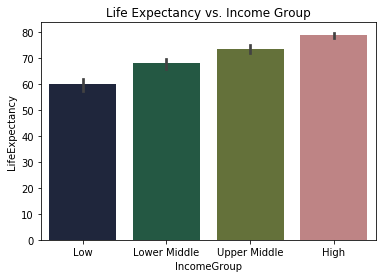

In [33]:
income_group_plot = sns.barplot(x='IncomeGroup', y='LifeExpectancy', data=df)
income_group_plot.set_title('Life Expectancy vs. Income Group')

Life expectancy increases across low, low-middle, upper-middle, and high income groups.

Text(0.5,1,'Life Expectancy vs. Region')

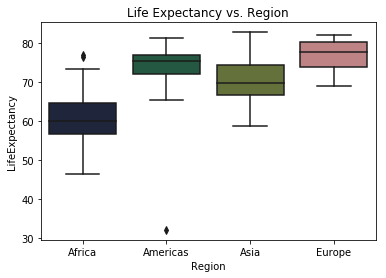

In [34]:
region_boxplot = sns.boxplot(x='Region',y='LifeExpectancy', data=df)
region_boxplot.set_title('Life Expectancy vs. Region')

Americas and Europe have the higher life expectancy medians, Asia is slightly less, while Africa is the lowest. Life expectancies for all regions seem fall fairly close to their relative median and are compact.

#### Distribution Plots

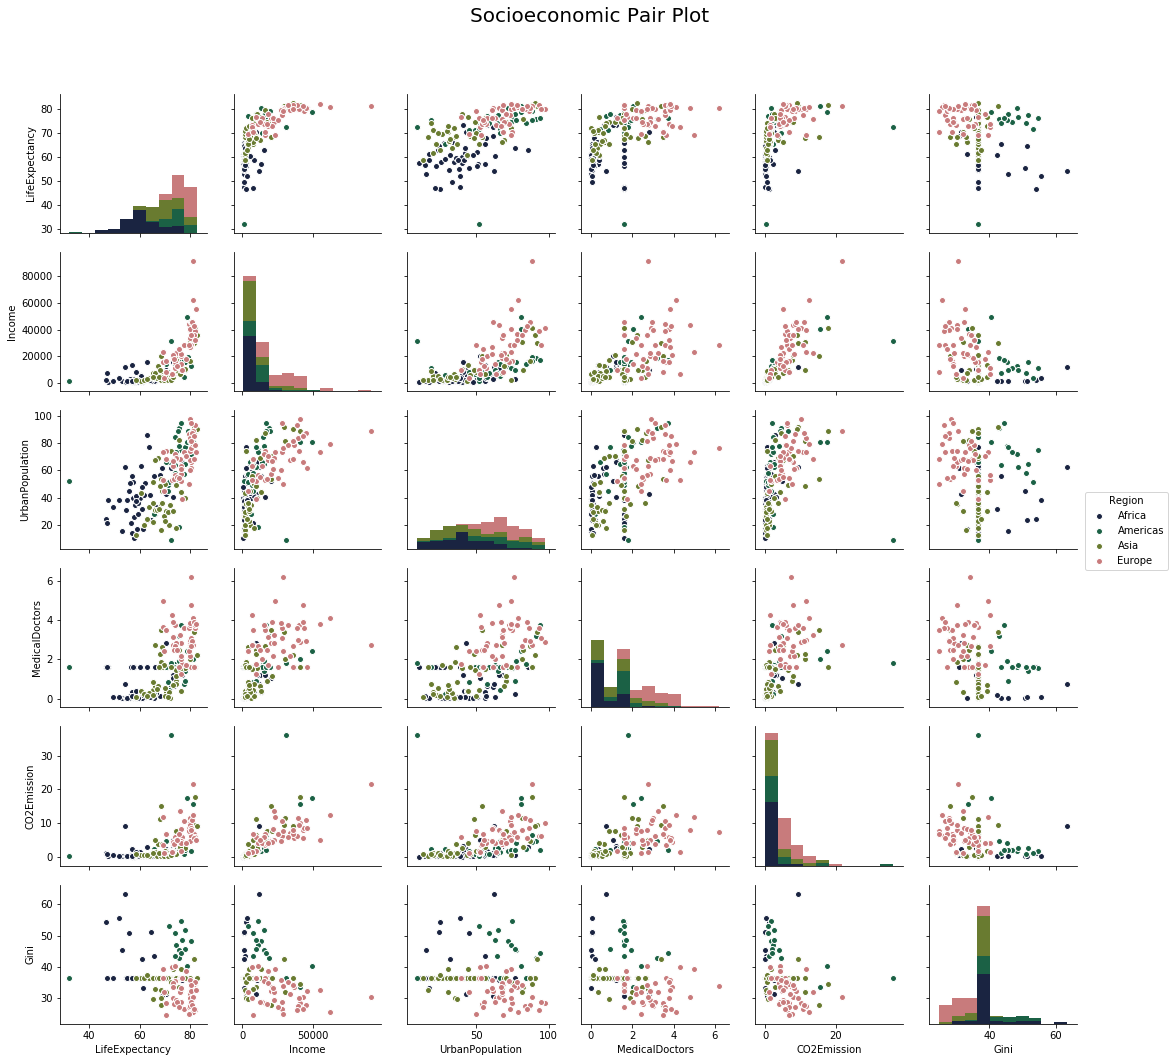

In [35]:
socioecon_pairplot = sns.pairplot(df,hue='Region')
socioecon_pairplot.fig.suptitle('Socioeconomic Pair Plot', size=20)
socioecon_pairplot.fig.subplots_adjust(top=.9)

#https://stackoverflow.com/questions/28638158/seaborn-facetgrid-how-to-leave-proper-space-on-top-for-suptitle

           

A pairplot was created to visually see the distributions and relationships among variables. I noticed that income, urban population, and CO2 emissons show a non-linear relationship with life expectancy and are rightly skewed. A logarithmic transformation was applied to linearize the relationship.  
***

Take the log of income, CO2 emissions and medical doctors.

In [36]:
df['log_income'] = np.log10(df['Income'])
df['log_CO2'] = np.log10(df['CO2Emission'])
df['log_medical_doctors'] = np.log10(df['MedicalDoctors'])

#https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

Drop the non-transformed columns. 

In [37]:
df = df.drop(columns = ['Income'])
df = df.drop(columns = ['CO2Emission'])
df = df.drop(columns = ['MedicalDoctors'])

Create regression plots showing relationship between life expectancy and the independent variables.

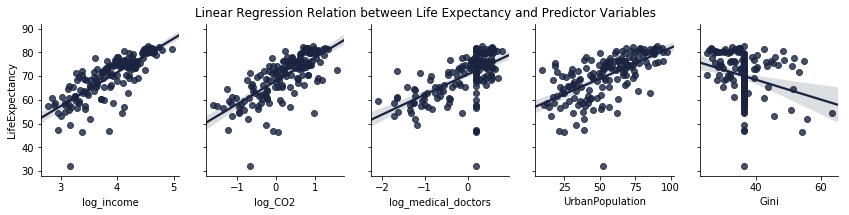

In [38]:
regression_pairplot = sns.pairplot(df, x_vars=['log_income','log_CO2','log_medical_doctors','UrbanPopulation','Gini'], y_vars=['LifeExpectancy'],size=3, aspect=.8, kind='reg');

regression_pairplot.fig.suptitle('Linear Regression Relation between Life Expectancy and Predictor Variables', size=12)
regression_pairplot.fig.subplots_adjust(top=.9)

#https://seaborn.pydata.org/tutorial/regression.html 

From the above, it can be seen that income, CO2 emissions, medical doctors and urban population, all have positive relationship with life expectancy, while the Gini is negative. 
***

Create a heatmap to see the specific correlations among variables.

In [39]:
heat_map = df.corr()

Text(0.5,1,'Socioeconomic Correlations')

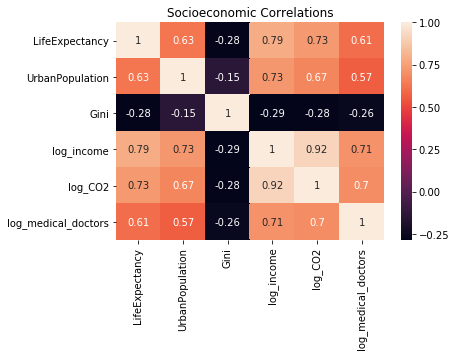

In [40]:
heat_map_plot = sns.heatmap(heat_map, annot=True)
heat_map_plot.set_title('Socioeconomic Correlations')

Urban population, income, CO2 emissions and medical doctors all show positive moderate correlations with life expectancy, where as the relationship with the Gini is negative and weak.
***

#### A Regression Approach

Completed multilinear regression, to see if there are linear dependencies between variables, building a model to predict life expectancy based on data.

In [41]:
df.columns

Index(['Country', 'Region', 'LifeExpectancy', 'UrbanPopulation', 'Gini',
       'IncomeGroup', 'log_income', 'log_CO2', 'log_medical_doctors'],
      dtype='object')

In [42]:
X = df[['UrbanPopulation', 'Gini','log_medical_doctors','log_income', 'log_CO2']]

In [43]:
y = df['LifeExpectancy']

Split data into the training and test set.

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Fit regression to the training set.

In [46]:
from sklearn.linear_model import LinearRegression

Create an object of linear regression class.

In [47]:
reg = LinearRegression()

Fit the model to the training data.

In [48]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Evaluate the model.

In [49]:
reg.coef_

array([ 0.04966211, -0.1057024 ,  0.7717224 , 13.97940927, -1.75376232])

Create dataframe with coefficients.

In [50]:
X_train.columns

Index(['UrbanPopulation', 'Gini', 'log_medical_doctors', 'log_income',
       'log_CO2'],
      dtype='object')

In [51]:
pd.DataFrame(reg.coef_, X_train.columns, columns=['Coefficient']) 


,Coefficient
UrbanPopulation,0.049662
Gini,-0.105702
log_medical_doctors,0.771722
log_income,13.979409
log_CO2,-1.753762


Coefficient interpretation: 

_A 10% increase in medical doctors, will increase life expectancy by .771722(log(1.10)) = 0.0319 years <br>
A 10% increase in income, will increase life expectancy by 13.979409(log(1.10)) = 0.579 years <br>
A 10% increase in CO2 emissions, will decrease life expectancy by -1.753762(log(1.10)) = 0.0726 years <br>
For an increase in 1 unit of urban population, life expectancy will increase by .0496 years <br>
For an increase in 1 unit of Gini index, life expectancy will decrease by .106 years_ <br>


(http://kenbenoit.net/assets/courses/ME104/logmodels2.pdf)

Predit test set results.

In [52]:
predictions = reg.predict(X_test)
predictions

array([55.62409118, 66.65439186, 58.03910679, 58.41882203, 63.09362207,
       60.05252423, 69.74542629, 80.86458723, 65.68353517, 65.93777229,
       59.3110184 , 71.77502876, 69.92852997, 80.54354597, 58.83221496,
       57.08376374, 60.05702525, 59.58058555, 68.91299785, 72.80944284,
       78.96417802, 74.63433866, 60.53656442, 75.73868186, 68.27128091,
       76.34903288, 74.42882876, 58.44626896, 64.4954175 , 66.70208987,
       68.85747811, 75.84428669, 77.4507291 , 77.75266768, 68.07837785,
       73.33966067, 69.44705184, 69.95520538, 70.04140127, 80.09932401,
       76.77543671, 60.99506401, 76.79452409, 70.53062932, 69.47431725,
       78.92384628, 55.48358787, 80.28461424, 74.14305338])

Create a scatter plot for visual representation

Text(0.5,1,'Actual vs. Predicted Values')

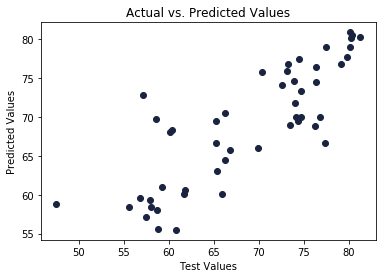

In [53]:
plt.scatter(y_test,predictions)
plt.xlabel('Test Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values') 

From the above graph, it can be seen that the model does not account for a lot of the variance, since the data points are fairly scattered and not close together.
***


Create a plot to see the distribution of the residuals.

Text(0.5,1,'Residual Distribution')

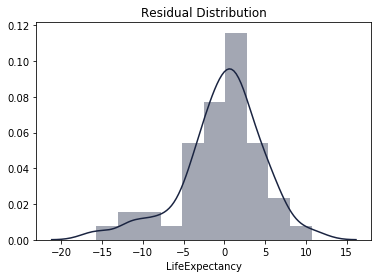

In [54]:
residual_dist = sns.distplot(y_test-predictions)
residual_dist.set_title('Residual Distribution')   

The distribution appears to be fairly normally distributed, indicating that the model was the right choice.
***

Review evaluation metrics, to analyze the differance of predicted against actual true values.

In [55]:
from sklearn import metrics

In [56]:
metrics.mean_absolute_error(y_test, predictions)

3.578170737423577

In [57]:
metrics.mean_squared_error(y_test, predictions)

23.924210819470186

In [58]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

4.891238168344513

In [59]:
metrics.explained_variance_score(y_test, predictions)
#while low error values are good, it is difficult to come to any true conclusions from them right now, since they would more come into use when assessing which model is better.
#for this regression section, I referenced "Python for Data Science and Machine Learning Bootcamp," Jose Portilla.

0.6767458097125731

The R2 value is not so high, at 67.7%, the model only moderatly explains some of the variance.


<a id='conclusions'></a>
## Conclusions

>I took an introductory approach to exploring this data set with Python, as I continue learning more advanced methods, the above investigation can be improved in many ways. First of all, I did not perform any statistical tests and this should be considered in my next steps. The data set had a lot of missing data for medical doctors and Gini variables, I think that substituting so many missing values negatively impacted the overall model, I should first try to replace the missing data with other values (median, mode, etc.) to see if it will improve the overall model. I can also try to improve the model through Backward Elimination, to remove the variables that are not statistically significant. Apart from removing variables, I think that more variables should have been chosen to begin with, the model that I built only in-sample explains some of the factors that affect life expectancy; there are many more categories of data that I should have chosen from to do an all-round analysis. Another issue is that the selected variables and the derived coefficients are not truly independent of each other, for example, with urbanization, one may expect better medical care and higher incomes. 
>
>But even in this context, it can be seen that holding all other the variables constant but one and assessing its impacts, independent variables show a considerable effect on life expectancy,  and that the correlation between the variables together explains 67.7% of variance of life expectancy; showing that there is a relationship between life expectancy and the independent variables (the extent of this relationship needs to be investigated further).
